# Exercise 2: Sentiment Analysis on movie reviews
- Write a text classification pipeline to classify movie reviews as either positive or negative.
- Find a good set of parameters using grid search.
- Evaluate the performance on a held out test set


## Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

## Fetch movie_reviews data

In [3]:
ls data/movie_reviews/

fetch_data.py*


In [9]:
%%time
! python data/movie_reviews/fetch_data.py 

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 311 ms


In [11]:
ls data/movie_reviews/txt_sentoken/

neg/  pos/


## Load libraries

In [12]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
ls data/movie_reviews/txt_sentoken/

neg/  pos/


## Load data

In [16]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = 'data/movie_reviews/txt_sentoken/'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


### Split data into training and testing

In [17]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: 
## Build a vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent

In [18]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: 

## Build a grid search to find out whether unigrams or bigrams are more useful.

### Fit the pipeline on the training set using grid search for the parameters

In [19]:
parameters = {
'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# TASK: 

### print the mean and std for each candidate along with the parameter settings for all the candidates explored by grid search.

In [20]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.02


# TASK: 

## Predict the outcome on the testing set and store it in a variable named `y_predicted`

In [21]:
y_predicted = grid_search.predict(docs_test)

###  Print the classification report


In [24]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.87      0.86      0.86       244
        pos       0.87      0.88      0.87       256

avg / total       0.87      0.87      0.87       500



## Display and print and plot the confusion matrix

In [25]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[209  35]
 [ 31 225]]


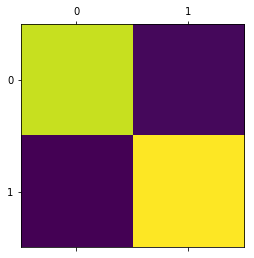

In [28]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()